
# Ekşisözlük Dünün en beğenilen entrysi (DEBE) görselleştirme

## [0. Giriş](#giris) 
## [1. Veriyi bulmak ve çekmek](#veribulma)
#### [1.1. Github api kullanarak dosyalara ulaşmak](#veribulma_1)
#### [1.2 Türkçe karakter sorununu giderme](#veribulma_2)
## [2. Veriyi İşleme ve Temizleme](#veriisleme)
## [3. Görselleştirme](#gorsellestirme)

<a class="anchor" id='giris'></a>
## 0. Giriş

Nihai amacımız Ekşisözlük üzerinde dünün en beğenilen entrylerini görsel olarak tek resimde gösteren bir kelime bulutu (word cloud) oluşturmak.

Bunun için tabii ki debelere ulaşmamız gerekli. Normal koşullarda kullanılabilir açık bir API olsaydı sözlükten doğrudan çekebilirdik.

Alternatifimiz bir web crawler yazmak veya bunu daha önce yapmış olanlardan yardım almak.

Şanslıyız ki https://debearsivi.github.io/  üzerinde arkadaşlar bunu yapmış, sitenin github.io olmasından verinin github.com üzerinde tutulduğunu görüyoruz ve doğrudan https://github.com/debearsivi/debearsivi.github.io üzerinden erişebiliyoruz.
    
Ufak bir araştırma sonrasında günlük verilerin https://github.com/debearsivi/debearsivi.github.io/tree/master/_posts üzerinde tutulduğunu görüyoruz.
    

Github apisi  kullanarak da verilerin linki görebiliyor. Api kullanarak nasıl çekileceğini hemen aşağıdagörebilirsiniz.
Ancak kısaca günlük debe indirme linki aşağıdaki gibi:
    
https://raw.githubusercontent.com/debearsivi/debearsivi.github.io/master/_posts/2019-01-01-01-Ocak-2019-eksisozluk-debe.md

Buradaki değişen güne göre dosya ismi olacak, dosyalardan birini açtığımızda ise yaml formatında olduğunu görüyoruz.
        

<a id='veribulma'></a>
## 1. Veriyi bulmak ve çekmek 

<a id='veribulma_1'></a>
### 1.1 Github api kullanarak dosyalara ulaşmak

Aşağıdaki kod örneği ile github repository üzerinden (_posts altında olduğunu biliyoruz) içeriğindeki bütün dosyaların indirme linkleri çekilebilir.
Paterni bildiğimiz için ona odaklanacağız ama kullanmak isteyen alttaki şekilde de kullanabilir

In [ ]:
import requests
import json 

#debearsivi.github.io uzerinde gayet guzel html olarak görülüyor
#posts folder altında bütün dosya listesini görmek için 
url = 'https://api.github.com/repos/debearsivi/debearsivi.github.io/contents/_posts?ref=master'
response = requests.get(url)

res = json.loads(response.text) 

#listeyi burada tutacagiz
debe_url_list = []

for ele in res:
    if ele["name"] == "*":
        #baslik dosyasi 
        continue
        
    #Sadece istedigimiz bilgileri alabilecegimiz bir dictionary
    debe = {}
    debe["name"] = ele["name"]
    debe["date"] = ele["name"][0:10] 
    debe["download_url"] = ele["download_url"]
    debe["url"] = ele["url"]
    
    debe_url_list.append(debe)
    
print(f"Toplam: {len(debe_url_list)} gün için dosya var")

In [2]:
#ilk url
debe_url_list[0:1]

[{'name': '2019-01-01-01-Ocak-2019-eksisozluk-debe.md',
  'date': '2019-01-01',
  'download_url': 'https://raw.githubusercontent.com/debearsivi/debearsivi.github.io/master/_posts/2019-01-01-01-Ocak-2019-eksisozluk-debe.md',
  'url': 'https://api.github.com/repos/debearsivi/debearsivi.github.io/contents/_posts/2019-01-01-01-Ocak-2019-eksisozluk-debe.md?ref=master'}]

Üstteki gibi bütün liste üzerinden işlem yapılabilir veya dizindeki dosyalarda belirli bir yapı olduğu için biz daha hızlı ve özelleşmiş çözümümüzü kullanabiliriz.
    

<a id='veribulma_2'></a>
### 1.2 Tarih girerek dosyayı çekmek

Dosyaların yapısı aşağıdaki şekilde

URL Taban: https://raw.githubusercontent.com/debearsivi/debearsivi.github.io/master/_posts/

Örnek: 2019-01-01-01-Ocak-2019-eksisozluk-debe.md

Yıl-Ay No-Gün-Gün-Ay-Yıl-eksisozluk-debe.md 

Bu durumda Günü vererek bir url oluşturabiliriz.

In [3]:
import urllib.request

url = 'https://raw.githubusercontent.com/debearsivi/debearsivi.github.io/master/_posts/2020-04-04-04-Nisan-2020-eksisozluk-debe.md'
debe_text = urllib.request.urlopen(url).read()


In [4]:
debe_text[0:300]

b"---\nlayout: post\ntitle: 04 Nisan 2020 Ek\xc5\x9fi S\xc3\xb6zl\xc3\xbck Debe\ndata:\n- entry_name: |\n    eba tv'deki g\xc3\xb6z kama\xc5\x9ft\xc4\xb1ran ingilizce \xc3\xb6\xc4\x9fretmeni\n  entry_id:  104681180\n  entry_writer: blackline\n  entry_fav_count: 1134\n  entry_content: |\n    vallahi \xc3\xa7ok g\xc3\xbczel \xc3\xb6\xc4\x9fretiyor. bize ne g\xc3\xb6r\xc3\xbcn\xc3\xbc\xc5\x9f\xc3\xbcnden. e\xc4\x9fitimi"

Görüldüğü gibi parse etmemiz gerek, tabiiki tekrar icat etmiyoruz ve yaml kütüphanesini kullanıyoruz.
Sisteminizde yüklü olmayan kütüphaneyi kurmak için

pip3 install kütüphane_ismini kullanabilirsiniz.

Bu defterde kullanılan kütüphaneleri kurmak için
```
pip3 install yaml
pip3 install bs4
pip3 install pandas
pip3 install httplib2
pip3 install wordcloud
```


In [5]:
#import urllib.request as urllib 
import yaml

#urlden debeleri yükleme
def load_debe_from_url(file_url):
    #Verilen url üzerinden debe dosyasını yükle ve ilk veriyi çek 
   
    dosya = urllib.request.urlopen(file_url)
    
    #aslında ikinci yaml girisi boş ancak format doğru olmadığı için hepsini okuyp ilk giriyi alacağız
    okunan_dosya = yaml.load_all(dosya)
    
    dict_array = []
    #yaml çıktı olarak bir generator veriyor içinde dolaşarak istediğimiz bilgileri çekiyoruz.
    for e in okunan_dosya:
        ##sadece ilki dolu olacak
        dict_array.append(e)
    print(dict_array[0]['title'])
    
    ##veriler data anahtarı içinde  diğer anahtarları görmek için
    #print(dict_array[0].keys())
    
    #sadece ilk verideki data ile ilgileniyoruz.
    return dict_array[0]['data']
    


In [6]:
#ilk entry
load_debe_from_url(url)[0]

04 Nisan 2020 Ekşi Sözlük Debe


c:\python37\lib\site-packages\ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load_all() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


{'entry_name': "eba tv'deki göz kamaştıran ingilizce öğretmeni\n",
 'entry_id': 104681180,
 'entry_writer': 'blackline',
 'entry_fav_count': 1134,
 'entry_content': 'vallahi çok güzel öğretiyor. bize ne görünüşünden. eğitimi böyle istekli versin yeter. teşekkürler öğretmen hanım.<br/><br/>edit: ne yazık ki insanoğlu böyle. tepki görünce çok güzel u dönüşü yapıyor. örnek mi???<br/><br/>edit 2: lütfen sağlık çalışanlarımızın koşullarını en iyi dereceye getirin. italya ve çin gibi en gerekli olan sağlık çalışanlarını korumayı atlamayın. sağlıkçılar yoksa ülkede sağlık da olmayacaktır. konu dışı yazı için özür dilerim..<br/><br/>edit 3: başlık şimdi çok cikss oldu. bir teşekkürde bunu düzelten modaratör arkadaşa.\n',
 'entry_channels': 'anket,eğitim'}

URL'leri tarihten otomatik dönüştürsek güzel olurdu bunu yapalım


In [7]:
from datetime import datetime

def generate_url_for_date(date_as_str):
    #date as YYYY-MM-DD
    #tarih YYYY-MM-DD şeklinde
    print(date_as_str)
    url = "https://raw.githubusercontent.com/debearsivi/debearsivi.github.io/master/_posts/"

    ##use date in two places two formats  YYYY-MM-DD-DD-Month-YYYY
    #tarih formatta yazılmış datetime strptime ve strftime kullanarak dönüştürelim
    url = url + date_as_str + "-" + datetime.strptime(date_as_str , '%Y-%m-%d').strftime("%d-%B-%Y")  + "-eksisozluk-debe.md"
    return url


In [8]:
#tarih testi özellikle Kasım ayını yazıyorum
tarih = "2011-11-01"
print( generate_url_for_date(tarih) )

2011-11-01
https://raw.githubusercontent.com/debearsivi/debearsivi.github.io/master/_posts/2011-11-01-01-November-2011-eksisozluk-debe.md


<a id='veribulma_3'></a>
### 1.2 Türkçe karakter sorununu giderme

Burada bir sorun var (bazılarınızda olacaktır)

Kullanıdığınız bilgisayarın tarih ayarları Türkçeden farklı ise tarihin ay bilgisi başka bir dilde yazılacak.

Bunu çözmek için yerelleştirmeyi ayarlamamız gerekli. 

In [9]:
#Kasım / Şubat gibi ascii olmayan (türkçe karakter içeren) urlleri de oluşturmak için locale ayarlanmalı
import locale
locale.setlocale(locale.LC_ALL, "tr_TR.UTF-8") # turkish

tarih = "2011-11-01"
datetime.strptime(tarih , '%Y-%m-%d').strftime("%d-%B-%Y")

'01-Kasım-2011'

Tekrar deneyince

In [10]:
tarih = "2011-11-01"
print( generate_url_for_date(tarih) )

2011-11-01
https://raw.githubusercontent.com/debearsivi/debearsivi.github.io/master/_posts/2011-11-01-01-Kasım-2011-eksisozluk-debe.md


Hadi yüklemeyi deneyelim

In [11]:
tarih = "2011-11-01"
url =  generate_url_for_date(tarih) 

debe = load_debe_from_url(url)
debe[0]

2011-11-01


UnicodeEncodeError: 'ascii' codec can't encode character '\u0131' in position 68: ordinal not in range(128)

Hata ile karşılaştık (UnicodeEncodeError).  Kasım ayını (veya Şubat) bu yüzden seçtim. 

Çünkü urllib.request.urlopen  adı üstünde URL (Uniform Resource Location) okuyor ve haliyle interneti bulan biz olmadığımız için ASCII bekliyor.

Bizim isteğimiz Türkçe karakter içeren bir sayfa bu da aslında IRI (Internationalized Resource Identifier)  yerelleştirilmiş kaynak tanımlandırıcı diyebiliriz. (https://en.wikipedia.org/wiki/Internationalized_Resource_Identifier). Hakkında Türkçe kaynak bulan bilgilendirebilir.

Bu işi tabi mevcutta web browserlar otomatik yapıyor, bizim de kodda yapmamız gerekli, ama bu problem daha önce zaten çözüldüğü için yapılmışını kullanıyoruz (diğer alternatifi de python requests .

Python mevcut http kütüphanesi (httplib) içinde çözüm olmadığı için  yardımımıza httplib2.iri2uri yetişiyor (alternatif: w3lib kütüphanesi) 


In [15]:
from datetime import datetime
import httplib2

def generate_url_for_date(date_as_str):
    #date as YYYY-MM-DD
    #tarih YYYY-MM-DD şeklinde
    print(date_as_str)
    url = "https://raw.githubusercontent.com/debearsivi/debearsivi.github.io/master/_posts/"

    ##use date in two places two formats  YYYY-MM-DD-DD-Month-YYYY
    #tarih formatta yazılmış datetime strptime ve strftime kullanarak dönüştürelim
    url = url + date_as_str + "-" + datetime.strptime(date_as_str , '%Y-%m-%d').strftime("%d-%B-%Y")  + "-eksisozluk-debe.md"
    
    ##her ne kadar url yazdıksak da aslında iri olan bilgiyi uri/url haline dönüştürmek için iri2uri fonksiyonunu kullanıyoruz
    return httplib2.iri2uri(url)



In [65]:
tarih = "2020-01-01"
url =  generate_url_for_date(tarih) 
print(url)
debe = load_debe_from_url(url)
print(debe[0])

2020-01-01
https://raw.githubusercontent.com/debearsivi/debearsivi.github.io/master/_posts/2020-01-01-01-Ocak-2020-eksisozluk-debe.md


c:\python37\lib\site-packages\ipykernel_launcher.py:15: YAMLLoadWarning: calling yaml.load_all() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  from ipykernel import kernelapp as app


01 Ocak 2020 Ekşi Sözlük Debe
{'entry_name': 'sovyet süpermarketi\n', 'entry_id': 99859127, 'entry_writer': 'klarkkent', 'entry_fav_count': 373, 'entry_content': '03.19\'da <a class="b" href="/?q=%c3%a7aykur">çaykur</a> <a class="b" href="/?q=rize+turist+%c3%a7ay%c4%b1">rize turist çayı</a>nı gördüğüm videodaki market. demek ki o zaman yurt dışına tarım ürünü ihraç ediyormuşuz.. <br/><br/><a rel="nofollow noopener" class="url" target="_blank" href="https://youtu.be/t8LtQhIQ2AE?t=199">https://youtu.be/t8ltqhiq2ae?t=199</a>\n', 'entry_channels': 'siyaset,tarih,haber,yeme-içme,ekonomi'}


Ek örnek olarak sadece dünün verilerini çekmek için otomatik "dün" hesaplama


In [66]:
from datetime import date, timedelta

bugun =  date.today()
dun = bugun - timedelta(days=1)
dun_str = datetime.strftime(dun, '%Y-%m-%d')
print(dun_str)


2020-11-10


Artık elimizde çalışabileceğimiz veri var. Veriler de python dictionary formatında olduğu için rahatlıkla Panda Dataframe yaratabiliriz



<a id='veriisleme'></a>
### 2. VERİ İŞLEME

En son çektiğimiz debe bir dictionary formatında. Python Pandas kütüphanisini kullarak satır/sütün formatında işleyebiliriz. 
Bunun için ilk önce veriyi pandas dataframe formatına çevirelim. 

In [67]:
#Bekledgimiz kolon isimleri:
debe[0].keys()

dict_keys(['entry_name', 'entry_id', 'entry_writer', 'entry_fav_count', 'entry_content', 'entry_channels'])

In [68]:
import pandas as pd

#df degiskenini debe dictionary kullanarak yarat
df = pd.DataFrame.from_records(debe)

#ilk 3 satirini goster
df.head(1)

,entry_name,entry_id,entry_writer,entry_fav_count,entry_content,entry_channels
0,sovyet süpermarketi\n,99859127,klarkkent,373,"03.19'da <a class=""b"" href=""/?q=%c3%a7aykur"">ç...","siyaset,tarih,haber,yeme-içme,ekonomi"


Burada farkedecegimiz uzere metin veriler \n ile bitiyor. Bu aslinda satir sonu (newline) karakteri. Tab (atlama) karakteri var ise onun icin de \r olacakti.
Bir diger hizlica dikkat edilen nokta ozel isimler  ' ile ayrilmis. kelimeleri bu karakterleri silerek veya bosluk ile degistirerek ayirirsak daha iyi bir goruntu saglariz.
Vaktiniz oldugunda tek tek incelerseniz bazi girilerde html taglari (ornegin `<b>` <b> kalin karakter </b> ) da olacagini goreceksiniz.

Öncelikle html taglarini değiştirleim. Html kodundan sadece ilgili metin kısmını almak icin teker teker tag bazlı değiştirme yerine python icin en iyi html/xml parserlarindan olan BeautifulSoup kullancağız.


In [69]:
import pandas as pd
from bs4 import BeautifulSoup

df = pd.DataFrame.from_records(debe)

#burada kolon basina apply fonksiyonu kullanarak verecegimiz 
#basit bir fonksiyonun kolondaki butun satirlarda uygulanmasini sagliyoruz
#BeautifulSoup(text, 'html.parser').get_text() kullanarak varsa html kodu icerigindeki sadece text kismini almasini sagliyoruz

df["entry_content"] = df["entry_content"].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())
df["entry_name"] = df["entry_name"].apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())



Tek karakter/sabit metin değiştirmek icin str.replace(degisecek_metin, yerine_konulacak_metin) kullanabiliriz.
Noktalama işaretlerini temizlemenin en iyi yöntemlerinden birisi regular expression kullanmak, bunu da kendiniz test edebilirsiniz (örneği code comment olarak aşağıda var).


In [70]:

#noktalama isaretlerinin bazilarini degistirmek icin
df["entry_name"] = df["entry_name"].str.replace("\n"," ")
df["entry_name"] = df["entry_name"].str.replace("'"," ")

#regular expression ornegi 
#r"[A|B]" > r=regular expression, |= veya , [A|B]  A veya B ...
#farkli yontemler de mevcut
#https://stackoverflow.com/questions/16576983/replace-multiple-characters-in-one-replace-call
#df["entry_name"] = df["entry_name"].str.replace(r"['|\n']"," ") 


df["entry_content"] = df["entry_content"].str.replace("\n","")
df["entry_content"] = df["entry_content"].str.replace("'"," ")



In [71]:
df.head(1)

,entry_name,entry_id,entry_writer,entry_fav_count,entry_content,entry_channels
0,sovyet süpermarketi,99859127,klarkkent,373,03.19 da çaykur rize turist çayını gördüğüm vi...,"siyaset,tarih,haber,yeme-içme,ekonomi"


Temizliği yaptığımıza göre (şimdilik) görselleştireceğimiz kelime listesini oluşturmamız gerekli.
Bunun için en iyi adaylar entry_name (başlık) ve entry_content (başlık içerik) kolonları.

Her ikisini de bütün satırları tek bir metinde birleştirmek için önce kolonları list haline getirip sonra hepsini join kullanarak bağlayacağız.


In [72]:
basliklar_metni = " ".join(df["entry_name"].tolist())
icerikler_metni = " ".join(df["entry_content"].tolist())

In [73]:
#ilk 100 karakteri gosterelim
icerikler_metni[0:100]

'03.19 da çaykur rize turist çayını gördüğüm videodaki market. demek ki o zaman yurt dışına tarım ürü'

<a id="gorsellestirme"></a>
## 3. Görselleştirme

Kelime bulutu temelde çok sık tekrarlanan (frekansı yüksek) kelimeleri daha büyük harfle, daha az tekrarlanan kelimeleri daha küçük harflerle tek bir resim üzerinde uygunca yerleştirerek göstermek.

Bunun için de wordcloud kütüphanesini kullanacağız.


Öncelikle resmi çizeceğimi alanı yaratalım (Jupyter notebook üzerinde gösterim için)
Bunun için wordcloud çıktısını ekran üzerine çizen bir yardımcı fonksiyon yazalım. pandas ile birlikte gelen matplotlib kutuphanesini kullanabiliriz.

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline  
#ustteki satir hucre uzerinde gostermenizi saglar

def plot_cloud(kelimebulutu):
    # Figur buyuklugu, oran wordcloud resim oranina benzerse daha iyi sonuc verir
    # Bu sadece mevcut ekranda cizmek icin
    plt.figure(figsize=(40, 30))
    # Ekranda x/y axlarini gostermesin 
    plt.axis("off");
    # Display image
    plt.imshow(kelimebulutu) 

    

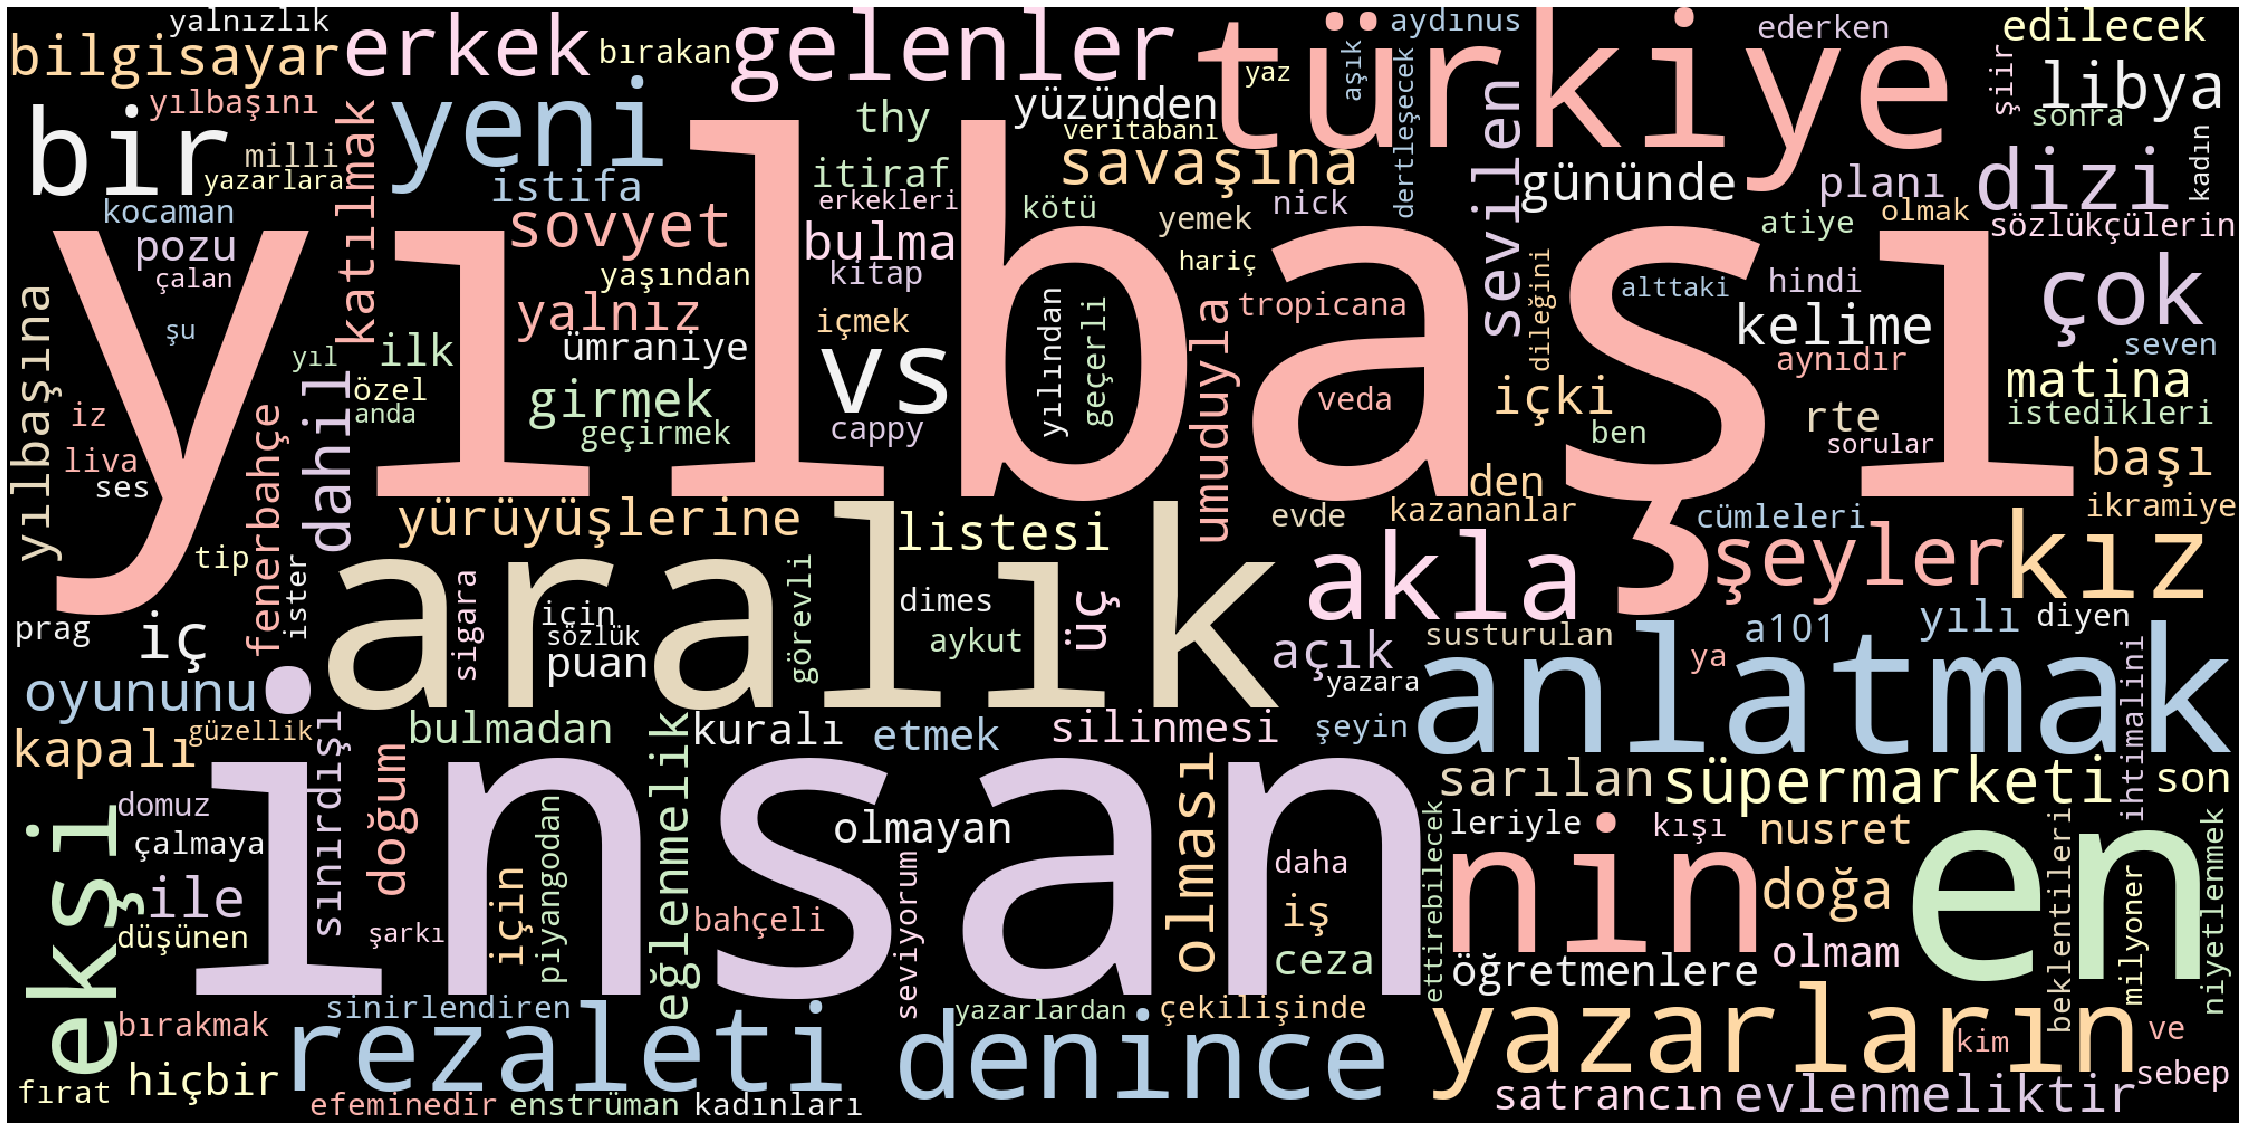

In [75]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#hangi metini gorsellesirecegiz (dogrudan da besleyebilirsiniz)
text = basliklar_metni

# Kelime bulutu olustur:
# width = genislik, height = yukseklik
# background_color = arkaplan rengi(black/blue vs.)  
# olasi renkler > http://www.science.smith.edu/dftwiki/images/3/3d/TkInterColorCharts.png
# colormap = renk paterni  >  https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html 
# collocations = kelimelerin tekrarlanmasini engellemek icin false
# stopwords = hangi kelimelerin gozardi edilecegi (turkceleri icin bir sonraki asama)
# random_state = sabit bir deger verilirse her ayni girdi icin ayni sekilde resmi uretir

# Bu asama bilgisayar hizina resim/metin buyuklugune gore biraz surebilir
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, 
                      background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Goster
plot_cloud(wordcloud)


Güzel çıkardık ama bir sorun var: bir, de , ve gibi kelimeler genelde hep büyük görülecek çünkü en çok kullanılan kelimeler.
wordclouds içindeki STOPWORDS / engellenecek kelimeler İngilizce odaklı olduğundan işimize yaramaz. 

Kendi listemizi list halinde  oluşturabiliriz. 

```
STOPWORDS_TR = ["bir", "de", "ve"]  
```

veya bunun için zaten araştırma yapan arkadaşlardan yardım alabiliriz.

https://github.com/ahmetax/trstop üzerinde modül olarak kelime sıklığının da kontrol edilebileceği bir çalışma yapılmış.

    

Buradaki https://github.com/ahmetax/trstop/blob/master/dosyalar/turkce-stop-words dosyasını çekip ulaşabileceğimiz bir noktaya kaydedelim.

STOPWORDS_TR değişkenini dosyayı satır satır okuyayak oluşturalım.


In [76]:
with open('trstopwords.txt', encoding='utf-8') as f:
    STOPWORDS_TR=f.read().split("\n")

#bu listeye kelime eklemek istersek aşağıdaki şekilde yapabiliriz
STOPWORDS_TR.append('http')

#listeye baska bir liste eklemek icin extend kullanabiliriz
ek_liste =['https','bknz','bkz','edit','com']
STOPWORDS_TR.extend(ek_liste)


Üstte çalıştırdığımız kodu aynı şekilde ama bu sefer Türkçe engellenen kelimeleri kullarak çalıştıralım

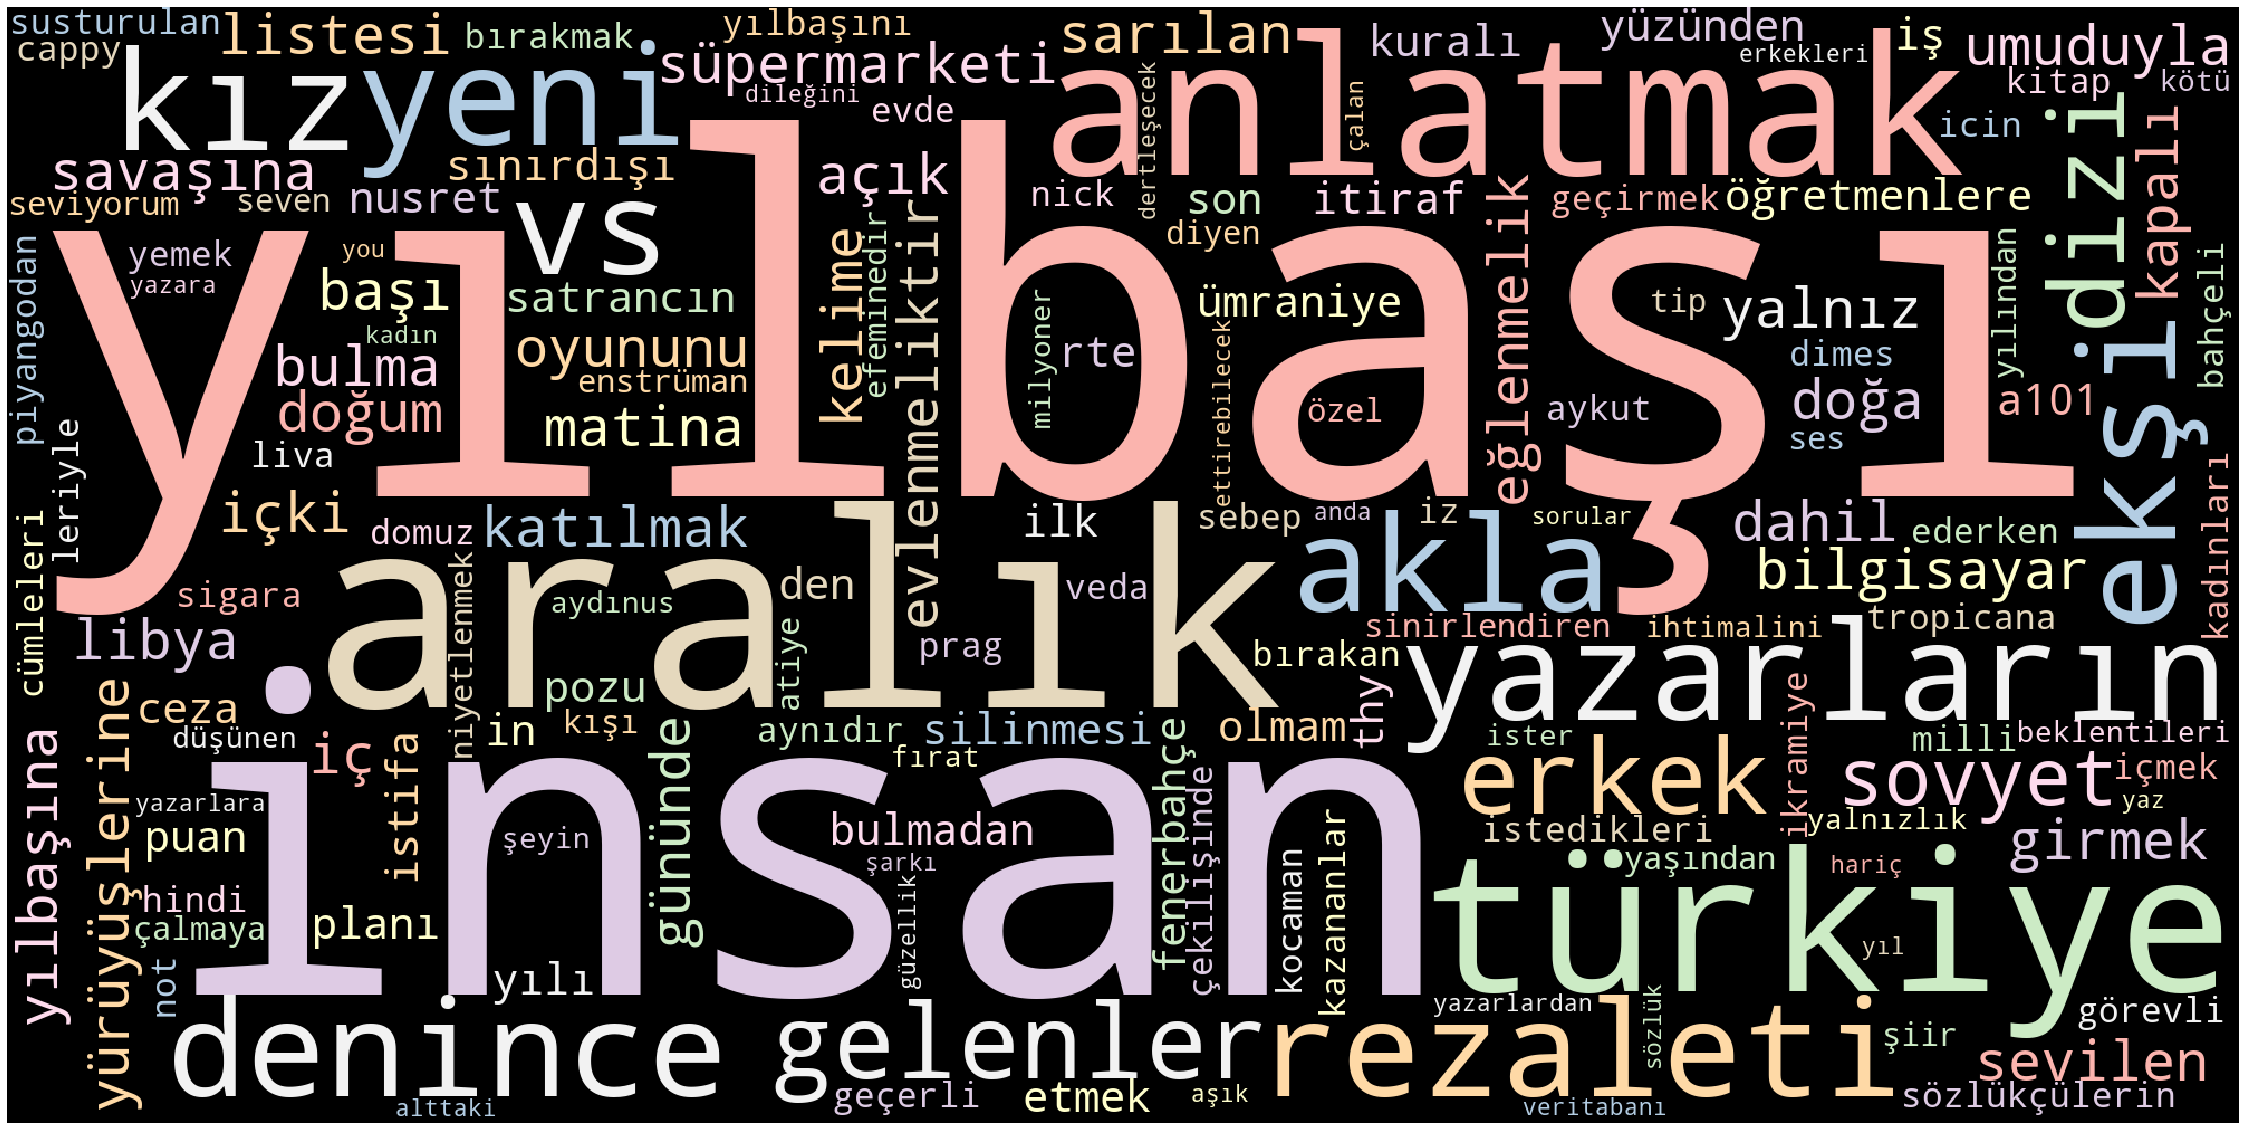

In [79]:
text = basliklar_metni

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, 
                      background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS_TR).generate(text)
# Goster
plot_cloud(wordcloud)

Bu resmi bir dosyaya kaydetmek için wordcloud kütüphanesinin doğrudan arabirimini kullanabiliriz.


In [80]:
# Resmi dosyaya kaydetmek için
wordcloud.to_file("debe_kelime_bulutu.png")

https://github.com/gorkemgoknar/debekelimebulutu